In [9]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import pickle

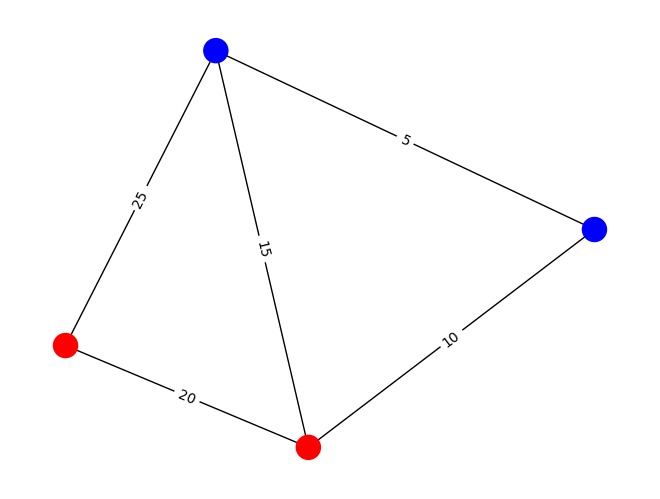

In [10]:
# Create an undirected graph
G = nx.Graph()

# Add nodes with attributes
G.add_node("A", type="intersection")
G.add_node("B", type="intersection")
G.add_node("C", type="traffic_light")
G.add_node("D", type="traffic_light", color="red")

# Add weighted edges
G.add_edge("A", "B", weight=5)
G.add_edge("B", "C", weight=10)
G.add_edge("C", "A", weight=15)
G.add_edge("C", "D", weight=20)
G.add_edge("D", "A", weight=25)

# Visualize the graph
pos = nx.spring_layout(G)
# Change color of nodes based on type
node_color = [
    "red" if G.nodes[n]["type"] == "traffic_light" else "blue"
    for n in G.nodes
]
nx.draw(G, pos, with_labels=False, node_color=node_color)
labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()

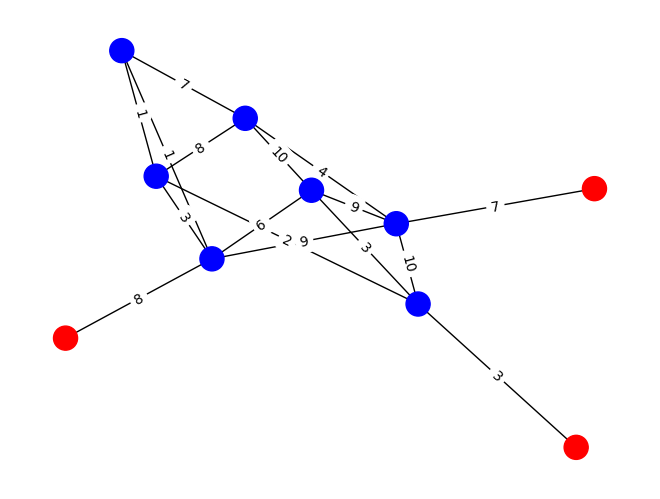

In [11]:
# Create a directed graph
G = nx.Graph()

# Add 10 nodes of type "intersection"
G.add_nodes_from(
    [
        (f"intersection_{i}", {"type": "intersection"})
        for i in range(7)
    ]
)

# Add 5 nodes of type border point
G.add_nodes_from(
    [
        (f"border_{i}", {"type": "border"})
        for i in range(3)
    ]
)

# Add between 2 and 4 edges for each intersection
for i in range(7):
    for j in range(random.randint(2, 4)):
        G.add_edge(
            f"intersection_{i}",
            f"intersection_{random.randint(0, 6)}",
            weight=random.randint(1, 10)
        )

# Connect each border point to a random intersection
for i in range(3):
    G.add_edge(
        f"border_{i}",
        f"intersection_{random.randint(0, 6)}",
        weight=random.randint(1, 10)
    )

# Remove self loops
G.remove_edges_from(nx.selfloop_edges(G))

# Visualize the graph
pos = nx.spring_layout(G, seed=42)
# Change color of nodes based on type
node_color = [
    "red" if G.nodes[n]["type"] == "border" else "blue"
    for n in G.nodes
]
nx.draw(G, pos, with_labels=False, node_color=node_color)
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, "weight"))
plt.show()


In [12]:
# Save the graph to a file
pickle.dump(G, open('graph.pickle', 'wb'))

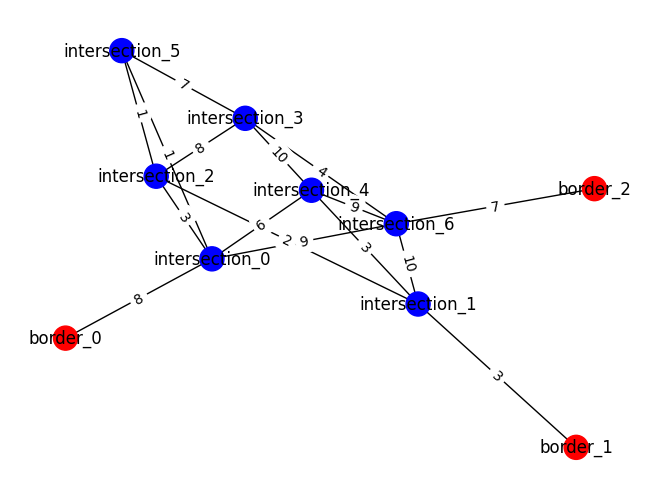

In [13]:
# Load the graph from a file
G = pickle.load(open('graph.pickle', 'rb'))

# Visualize the graph
pos = nx.spring_layout(G, seed=42)
# Change color of nodes based on type
node_color = [
    "red" if G.nodes[n]["type"] == "border" else "blue"
    for n in G.nodes
]
nx.draw(G, pos, with_labels=True, node_color=node_color)
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, "weight"))
plt.show()

In [14]:
# Calculate the shortest path between two nodes
path = nx.dijkstra_path(G=G, source="border_1", target="border_2", weight="weight")
path

['border_1', 'intersection_1', 'intersection_6', 'border_2']

In [15]:
G

<module 'matplotlib.pyplot' from '/Users/jonas/git/ias_project/.venv/lib/python3.13/site-packages/matplotlib/pyplot.py'>

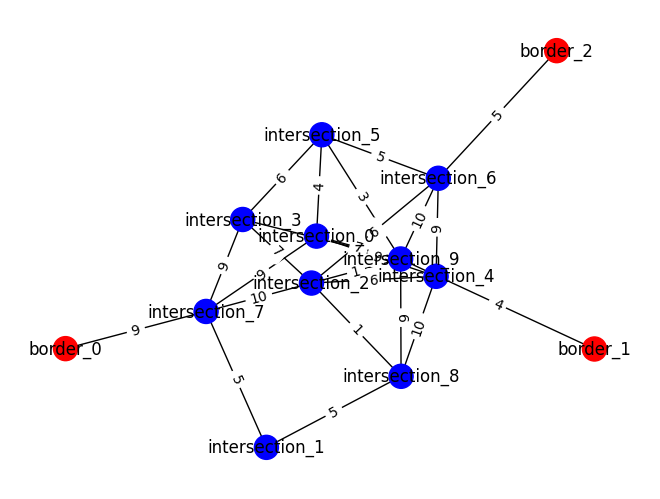

In [16]:
from graph import Graph

G = Graph()

G.generate_plot()

In [17]:
G.save("test.pickle")

<module 'matplotlib.pyplot' from '/Users/jonas/git/ias_project/.venv/lib/python3.13/site-packages/matplotlib/pyplot.py'>

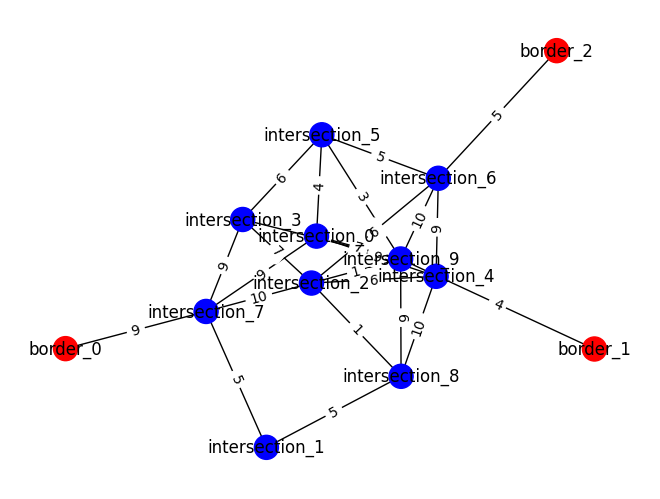

In [18]:
G = pickle.load(open("test.pickle", "rb"))

G.generate_plot()